In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Feature Engineering: Adding Aggregated Features
data['total_delay'] = data[['VSKP', 'YLM', 'ANV', 'SLO', 'NDD', 'BZA', 'WL', 'KZJ', 'SC']].sum(axis=1)
data['mean_temperature'] = data[['Temperature_1', 'Temperature_2', 'Temperature_3', 
                                 'Temperature_4', 'Temperature_5', 'Temperature_6', 
                                 'Temperature_7', 'Temperature_8', 'Temperature_9', 
                                 'Temperature_10']].mean(axis=1)
data['mean_wind_speed'] = data[['Wind_Speed_1', 'Wind_Speed_2', 'Wind_Speed_3', 
                                'Wind_Speed_4', 'Wind_Speed_5', 'Wind_Speed_6', 
                                'Wind_Speed_7', 'Wind_Speed_8', 'Wind_Speed_9', 
                                'Wind_Speed_10']].mean(axis=1)

print(data)


     VSKP  Temperature_1  Wind_Speed_1  weather_code_1  Distance_travelled_1  \
0       2           30.2           2.8              63                     0   
1       2           31.2           2.1              51                     0   
2       0           30.5           2.4              51                     0   
3       1           30.5           2.3              53                     0   
4       0           30.2           2.3              51                     0   
..    ...            ...           ...             ...                   ...   
360     1           29.8           2.0              51                     0   
361     4           30.0           2.8              55                     0   
362     1           28.6           2.6              61                     0   
363     0           28.3           2.1              51                     0   
364     4           29.6           2.5              51                     0   

     YLM  Temperature_2  Wind_Speed_2  

Missing values in each column:
VSKP                     0
Temperature_1            0
Wind_Speed_1             0
weather_code_1           0
Distance_travelled_1     0
YLM                      0
Temperature_2            0
Wind_Speed_2             0
weather_code_2           0
Distance_travelled_2     0
ANV                      0
Temperature_3            0
Wind_Speed_3             0
weather_code_3           0
Distance_travelled_3     0
SLO                      0
Temperature_4            0
Wind_Speed_4             0
weather_code_4           0
Distance_travelled_4     0
NDD                      0
Temperature_5            0
Wind_Speed_5             0
weather_code_5           0
Distance_travelled_5     0
BZA                      2
Temperature_6            0
Wind_Speed_6             0
weather_code_6           0
Distance_travelled_6     0
WL                       0
Temperature_7            0
Wind_Speed_7             0
weather_code_7           0
Distance_travelled_7     0
KZJ                     

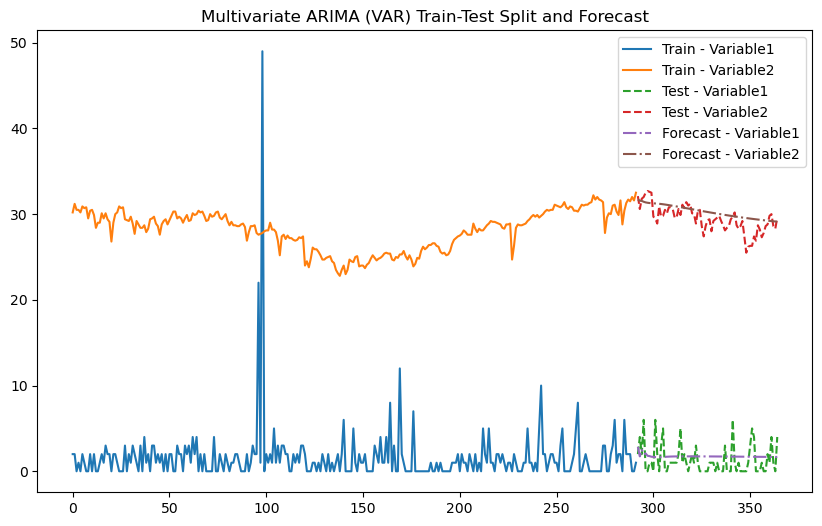

In [24]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt

data = pd.read_csv('new_data1.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Split the dataset into training and testing sets
train_size = 0.8  # Use 80% of the data for training
train, test = train_test_split(data, train_size=train_size, shuffle=False)

# Scale the dataset
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Fit a VAR model (only autoregressive part)
model = VAR(train_scaled)
model_fit = model.fit(p)

# Forecast on the test set length
n_forecast = len(test)
# Use the last 'p' values of the fitted data for forecasting
forecast_scaled = model_fit.forecast(model_fit.fittedvalues[-p:], steps=n_forecast)

# Inverse transform the forecast to the original scale
forecast = scaler.inverse_transform(forecast_scaled)

# Convert forecast to DataFrame for easier plotting
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Plot training data, test data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.iloc[:, 0], label='Train - Variable1')
plt.plot(train.index, train.iloc[:, 1], label='Train - Variable2')
plt.plot(test.index, test.iloc[:, 0], label='Test - Variable1', linestyle='--')
plt.plot(test.index, test.iloc[:, 1], label='Test - Variable2', linestyle='--')
plt.plot(test.index, forecast_df.iloc[:, 0], label='Forecast - Variable1', linestyle='-.')
plt.plot(test.index, forecast_df.iloc[:, 1], label='Forecast - Variable2', linestyle='-.')
plt.legend()
plt.title('Multivariate ARIMA (VAR) Train-Test Split and Forecast')
plt.show()


In [28]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data (already loaded)
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column and separate the target variable (HYB)
data = data.drop(['date(dd/mm/yy)'], axis=1)
target = data[['HYB']]
features = data.drop(['HYB'], axis=1)

# Split the dataset into training and testing sets
train_size = 0.8  # Use 80% of the data for training
train_features, test_features = train_test_split(features, train_size=train_size, shuffle=False)
train_target, test_target = train_test_split(target, train_size=train_size, shuffle=False)

# Scale the features and the target variable separately
scaler_features = MinMaxScaler()
train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)

scaler_target = MinMaxScaler()
train_target_scaled = scaler_target.fit_transform(train_target)
test_target_scaled = scaler_target.transform(test_target)

# Fit a VAR model on the scaled features
model = VAR(train_features_scaled)
model_fit = model.fit(maxlags=5)

# Forecast using the test set length
n_forecast = len(test_features_scaled)
forecast_scaled = model_fit.forecast(model_fit.fittedvalues[-5:], steps=n_forecast)

# Inverse transform the forecast to the original scale
forecast_features = scaler_features.inverse_transform(forecast_scaled)

# Use the predicted features to forecast the target variable (HYB)
predicted_target = forecast_features[:, train_features.columns.get_loc('HYB')]

# Plot training data, test data, and forecast for HYB
plt.figure(figsize=(10, 6))
plt.plot(train_target.index, train_target, label='Train - HYB')
plt.plot(test_target.index, test_target, label='Test - HYB', linestyle='--')
plt.plot(test_target.index, predicted_target, label='Forecast - HYB', linestyle='-.')
plt.legend()
plt.title('HYB Delay Prediction - Train, Test, and Forecast')
plt.show()


KeyError: 'HYB'

In [88]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima


# Load the data
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column and separate the target variable (HYB)
data = data.drop(['date(dd/mm/yy)'], axis=1)
target = data[['HYB']]
features = data.drop(['HYB'], axis=1)

# Split the dataset into training and testing sets
train_size = 0.8  # Use 80% of the data for training
train_features, test_features = train_test_split(features, train_size=train_size, shuffle=False)
train_target, test_target = train_test_split(target, train_size=train_size, shuffle=False)

# Fit an ARIMA model on the target variable (HYB)
# p, d, q = 5, 1, 2  # ARIMA model parameters (these can be tuned)
# model_arima = ARIMA(train_target, order=(p, d, q))
model_arima = auto_arima(train_features, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=50)

model_fit_arima = model_arima.fit(train_features)

# Forecast on the test set length
n_forecast = len(test_target)
forecast_arima = model_fit_arima.forecast(steps=n_forecast)

# Plot training data, test data, and forecast for HYB
plt.figure(figsize=(10, 6))
plt.plot(train_target.index, train_target, label='Train - HYB')
plt.plot(test_target.index, test_target, label='Test - HYB', linestyle='--')
plt.plot(test_target.index, forecast_arima, label='Forecast - HYB', linestyle='-.')
plt.legend()
plt.title('Multivariate ARIMA (VARMA) - HYB Delay Prediction')
plt.xlabel('Day of year')
plt.ylabel('Delay (minutes)')
plt.show()

# Calculate errors for HYB
actual_values = test_target['HYB']  # Use test_target
predicted_values = forecast_arima

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

actual_values_safe = actual_values.replace(0, np.nan)  # Avoid division by zero for MAPE calculation
mape = np.mean(np.abs((actual_values_safe - predicted_values[~actual_values_safe.isna()]) / actual_values_safe)) * 100

# Calculate R² Score
from sklearn.metrics import r2_score  # Ensure this import is present
r2 = r2_score(actual_values, predicted_values)

# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

print("Predicted values\n", predicted_values)


ValueError: y should be a 1d array, got an array of shape (292, 49) instead.

In [70]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Split the dataset into training and testing sets (80% train, 20% test)
train_size = 0.8
train, test = train_test_split(data, train_size=train_size, shuffle=False)

# Scale the dataset using MinMaxScaler for the target variable (HYB)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['HYB']])  # Scale only the 'HYB' column
test_scaled = scaler.transform(test[['HYB']])  # Scale only the 'HYB' column

# Fit an ARMA model on the training data for the 'HYB' column
p = 5  # Order of the autoregressive part
q = 2  # Order of the moving average part
model = ARIMA(train['HYB'], order=(p, 0, q))  # p, d, q
model_fit = model.fit()

# Forecast the test set length
n_forecast = len(test)
forecast_scaled = model_fit.forecast(steps=n_forecast)

print(forecast_scaled)

# Inverse transform the forecast to the original scale
# Ensure forecast_scaled is a NumPy array
# After forecasting
forecast_scaled = model_fit.forecast(steps=n_forecast)

# Inverse transform the forecast to the original scale
# We will directly create a DataFrame from the forecast to maintain consistency
forecast_df = pd.DataFrame(forecast_scaled, columns=['HYB'])
forecast = scaler.inverse_transform(forecast_df)[:, 0]  # Extract the first column after inverse transforming

# Calculate errors for HYB
actual_values = test['HYB'].values
predicted_values = forecast  # Directly use the forecast array

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Calculate MAPE with safeguard against division by zero
actual_values_safe = pd.Series(actual_values).replace(0, np.nan)  # Avoid division by zero for MAPE calculation
mape = np.mean(np.abs((actual_values_safe - predicted_values[~actual_values_safe.isna()]) / actual_values_safe.dropna())) * 100

# Calculate R² Score
r2 = r2_score(actual_values, predicted_values)

# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# Plot the actual vs forecasted data for HYB
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['HYB'], label='Train - HYB')
plt.plot(test.index, test['HYB'], label='Test - HYB', linestyle='--')
plt.plot(test.index, predicted_values, label='Forecast - HYB', linestyle='-.')
plt.legend()
plt.title('ARMA - HYB Delay Prediction')
plt.xlabel('Time')
plt.ylabel('Delay (minutes)')
plt.show()


292    18.481958
293     7.092157
294    14.666958
295     8.976854
296    12.657586
         ...    
360     9.448891
361     9.448889
362     9.448886
363     9.448884
364     9.448883
Name: predicted_mean, Length: 73, dtype: float64


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [99]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [109]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

# Load the data
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Split the dataset into training and testing sets (80% train, 20% test)
train_size = 0.8
train, test = train_test_split(data, train_size=train_size, shuffle=False)

# Scale the dataset using MinMaxScaler for the target variable (HYB)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['HYB']])  # Scale only the 'HYB' column
test_scaled = scaler.transform(test[['HYB']])  # Scale only the 'HYB' column

for column in train_scaled:
    check_stationarity(column)
    print('\n')

AttributeError: 'numpy.ndarray' object has no attribute 'values'